# ***About Author***

#### ***[JaberAlJ GitHub](https://github.com/JaberAlJ)***

# **Importing Libraries**
Import necessary libraries

In [42]:
# Import Basis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler as SS

# Model
from sklearn.cluster import KMeans as KM, AgglomerativeClustering

# Model Evaluator
from sklearn.metrics import silhouette_score, davies_bouldin_score

# **Dataset**

In [2]:
live = pd.read_csv('Live.csv')
live.sample(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
3414,134115277150304_195571017671396,photo,11/19/2017 23:04,36,3,2,36,0,0,0,0,0,NaN,NaN,NaN,NaN
1474,246675545449582_510429085740892,video,2/23/2014 8:16,688,8,0,688,0,0,0,0,0,NaN,NaN,NaN,NaN
5511,614855718638584_714291028695052,video,1/26/2018 1:07,238,815,165,136,96,2,3,1,0,NaN,NaN,NaN,NaN
937,246675545449582_884925858291211,photo,2/1/2016 7:26,330,8,0,330,0,0,0,0,0,NaN,NaN,NaN,NaN
4517,725980084255106_867046466815133,video,5/21/2018 6:18,1368,1794,718,980,306,74,3,4,1,NaN,NaN,NaN,NaN
2743,134115277150304_259544587940705,photo,5/16/2018 23:12,24,1,0,24,0,0,0,0,0,NaN,NaN,NaN,NaN
5018,614855718638584_837399253050895,photo,5/27/2018 7:37,18,1,1,18,0,0,0,0,0,NaN,NaN,NaN,NaN
2121,246675545449582_278994208884382,photo,10/18/2012 7:19,26,11,0,26,0,0,0,0,0,NaN,NaN,NaN,NaN
3062,134115277150304_231417714086726,photo,2/28/2018 7:50,11,0,0,11,0,0,0,0,0,NaN,NaN,NaN,NaN
2544,246675545449582_253490791434724,photo,8/5/2012 0:03,14,1,0,14,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
live = live.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

### **About Dataset**
Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.

The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.  

In [4]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [5]:
live.describe(include='all')

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


Column Descriptions

- `status_type`	
- `num_reactions`	
- `num_comments`	
- `num_shares`	
- `num_likes`	
- `num_loves`	
- `num_wows`	
- `num_hahas`	
- `num_sads`	
- `num_angrys`


# **Data Preprocessing**

### **Uniques Values**
Review all **uniques** values in each column in the dataset

In [6]:
for col in live.columns:
    print("-"*30)
    print(f"{col} = {live[col].unique()}\n")

------------------------------
status_type = ['video' 'photo' 'video ' 'photo ' 'link' 'status' 'link ' 'status ']

------------------------------
num_reactions = [529 150 227 ... 558 570 415]

------------------------------
num_comments = [  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25   709  1979    17   145   116   157    46   120   486
     5   199    77   825   805   449    49   589   558    31   424   131
   525    24   491   633   588    20    23   417   355   564   110   605
   158   888   911   996   574    34    28  1381   524    19   462    40
   254   265   523   309    61    22   769    48    37   560   117   128
   427    54    95   266    75

### **Null Values**
Check for any null values

In [7]:
live.isna().values.any()

False

Count **null** values in each column

In [8]:
live.isna().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## 1. **Data Cleaning**
Data cleaning for each column

In [ ]:
# `status_type` col
live['status_type'] = live['status_type'].str.strip()
live['status_type'] = live['status_type'].str.lower()

In [11]:
live['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [12]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


## 2. **Data Encoding**
Data encoding for the **categorical variables**

In [13]:
# `status_type` col
live['status_type'].replace({'link': 0, 'photo': 1, 'status': 2, 'video': 3}, inplace=True)
live['status_type'] = live['status_type'].astype('int64')

In [14]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [15]:
for col in live.columns:
    print("-"*30)
    print(f"{col} = {live[col].unique()}\n")

------------------------------
status_type = [3 1 0 2]

------------------------------
num_reactions = [529 150 227 ... 558 570 415]

------------------------------
num_comments = [  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25   709  1979    17   145   116   157    46   120   486
     5   199    77   825   805   449    49   589   558    31   424   131
   525    24   491   633   588    20    23   417   355   564   110   605
   158   888   911   996   574    34    28  1381   524    19   462    40
   254   265   523   309    61    22   769    48    37   560   117   128
   427    54    95   266    75   165  6148   103   195    84  1201   147
   127    44   27

## 3. **Scaling the Dataset**
Scale the dataset

In [18]:
scaler = SS()
scaled_live = scaler.fit_transform(live)

# **Algorithm**

## 1. **Building and Training the Models**

In [26]:
# Building model-1
km_cls1 = KM(n_init=10)

# Fitting model-1
km_cls1_labels = km_cls1.fit_predict(live)

In [ ]:
# Building model-2
km_cls2 = KM(
    n_clusters=3,
    n_init=10
)

# Fitting model-2
km_cls2_labels = km_cls2.fit_predict(scaled_live)

# **Interpretation of Results**

## 1. **Calculate Silhouette Score**
The silhouette score measures how similar a point is to its own cluster compared to other clusters. It ranges from -1 to 1, with **higher values indicating better-defined clusters**.

In [ ]:
# Calculate Silhouette Score for model-1
km_cls1_silhouette_avg = silhouette_score(live, km_cls1_labels)
print("The average silhouette score for model-1 is :", km_cls1_silhouette_avg)

The average silhouette score for model-1 is : 0.761366932397758


In [46]:
# Calculate Silhouette Score for model-2
km_cls2_silhouette_avg = silhouette_score(scaled_live, km_cls2_labels)
print("The average silhouette score for model-2 is :", km_cls2_silhouette_avg)

The average silhouette score for model-2 is : 0.6594452034657087


## 2. **Davies-Bouldin Index**
This index evaluates the average similarity ratio of each cluster with the cluster that is most similar to it. **Lower values indicate better clustering**.

In [ ]:
# Calculate Davies-Bouldin Index model-1
km_cls1_db_index = davies_bouldin_score(live, km_cls1_labels)
print("The davies-bouldin index for model-1 is :", km_cls1_db_index)

The davies-bouldin index for model-1 is : 0.5390840429772064


In [47]:
# Calculate Davies-Bouldin Index model-2
km_cls2_db_index = davies_bouldin_score(live, km_cls2_labels)
print("The davies-bouldin index for model-2 is :", km_cls2_db_index)

The davies-bouldin index for model-2 is : 0.8165128682861433


# **Visualization**

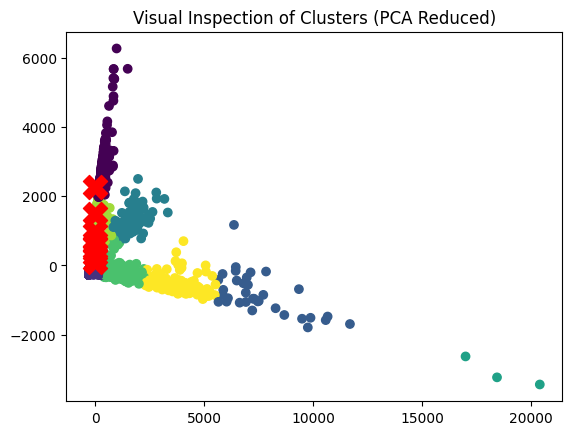

In [53]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_live = pca.fit_transform(live)

# Visual Inspection of the clusters
plt.scatter(reduced_live[:, 0], reduced_live[:, 1], c=km_cls1_labels, cmap='viridis')
plt.scatter(km_cls1.cluster_centers_[:, 0], km_cls1.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Visual Inspection of Clusters (PCA Reduced)')
plt.show()

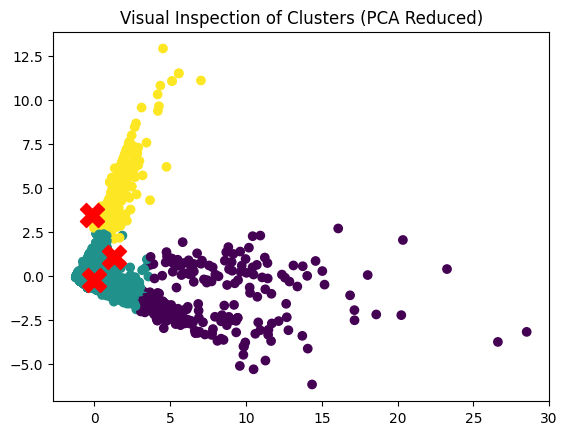

In [52]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_scaled_live = pca.fit_transform(scaled_live)

# Visual Inspection of the clusters
plt.scatter(reduced_scaled_live[:, 0], reduced_scaled_live[:, 1], c=km_cls2_labels, cmap='viridis')
plt.scatter(km_cls2.cluster_centers_[:, 0], km_cls2.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Visual Inspection of Clusters (PCA Reduced)')
plt.show()

# **Model's Performance and Evaluation**

- `Model-1` with a silhouette score of **0.761** suggests that the clusters are **well-defined and the data points are well-separated**. Also, has a DBI of **0.539**, **suggesting better clustering quality**.
- `Model-2` with a silhouette score of **0.659** indicates that the clusters are **less well-defined compared to the first model**. Also, has a DBI of **0.816**, **indicating poorer clustering quality**.

Therefore, the `Model-1` with the silhouette score of **0.761 is better** because it shows that the clusters are more distinct and the data points are more appropriately grouped within their respective clusters. Also, `Model-1` **is the better model based on the Davies-Bouldin Index**.